# Deterministic Ion Channel Model
based on
Liebovitch, L.S., Czegledy, F.P. A model of ion channel kinetics based on deterministic, chaotic motion in a potential with two local minima. Ann Biomed Eng 20, 517–531 (1992). https://doi.org/10.1007/

In [3]:
import matplotlib.pylab as plt
import numpy as np
import scipy.integrate

In [4]:
def dV1(x):
    """
    first derivative of potential with two minima
    potential 1 from Liebovitch et al., 1992
    """
    return -0.5*x+0.5*x*x*x

def dV2(x):
    """
    first derivative of potential with two minima
    potential 2 from Liebovitch et al., 1992
    """
    return -0.5*1.25*x+0.5*x*x*x

def rhs(t, y, gamma, f , omega, potential):
    """
    governing equation:
    1st term = friction
    2nd term =  force due to potential energy
    3rd term = driving force (here NOT stochastic BUT periodic)
    2nd order equation transformed into a 2d system of 1st order
    """
    dy1 = y[1]
    if potential==1:
        dy2 = -gamma*y[1] - dV1(y[0]) + f * np.cos(omega *t)
    elif potential==2:
        dy2 = -gamma*y[1] - dV1(y[0]) + f * np.cos(omega *t)
    else:
        raise TypeError("Undefined potential") 
    return [dy1, dy2]

In [20]:
t_eval = np.linspace(0, 1000, 100000)
# Initial conditions
# x(0) = dx(0)/dt = 0
y0 = np.array([0.0, 0.0])

model1_args = {
    'name': 'model1',
    'gamma': 0.22,
    'f': .16,
    'omega': 0.833,
    'potential':1,
}

model2_args = {
    'name': 'model2',
    'gamma': 0.19,
    'f': .16,
    'omega': 0.833,
    'potential':1,
}

model3_args = {
    'name': 'model3',
    'gamma': 0.22,
    'f': .16,
    'omega': 0.833,
    'potential':2,
}

model = model1_args
args = [
        model['gamma'], model['f'], model['omega'], model['potential']
]
sol = scipy.integrate.solve_ivp(
    fun=lambda t, y: rhs(t, y, *args),
    t_span=[t_eval[0], t_eval[-1]],
    y0=y0, t_eval=t_eval
)

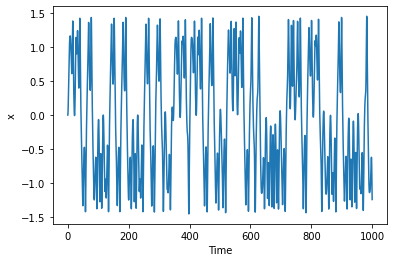

In [21]:
fig = plt.figure()
plt.plot(sol.t, sol.y[0, :], label=model['name'] + ' x')
#plt.legend()
plt.ylabel('x')
plt.xlabel('Time')
plt.show()

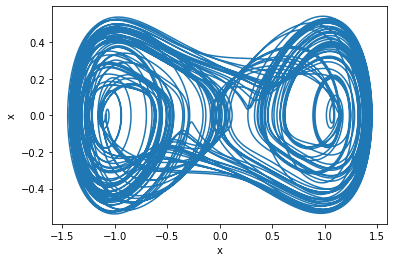

In [22]:
fig = plt.figure()
plt.plot(sol.y[0, :], sol.y[1, :])
plt.ylabel('x')
plt.xlabel('x')
plt.show()